In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('lahman2016.sqlite')

In [3]:
query = '''select * from Teams
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

In [8]:
data= pd.read_csv("C:/Users/Harsh/OneDrive/Documents/baseball.csv")

In [11]:
data.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [13]:
len(data)

30

In [15]:
data.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


In [17]:
print(data.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
print(data.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'histogram of wins')

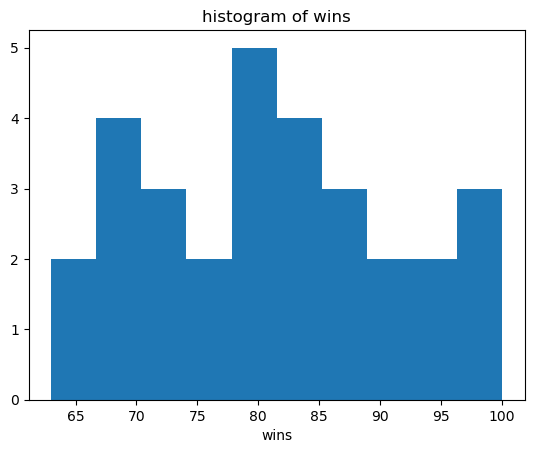

In [22]:
plt.hist(data['W'])
plt.xlabel('wins')
plt.title('histogram of wins')

In [24]:
data['W'].mean()

80.96666666666667

In [25]:
def assign_win_bins(w):
    if w < 50:
        return 1
    if w >= 50 and w <= 69:
        return 2
    if w >= 70 and w <= 89:
        return 3
    if w >= 90 and w <= 109:
        return 4
    if w >= 110:
        return 5

In [28]:
data['win_bins'] = data['W'].apply(assign_win_bins)

Text(0, 0.5, 'wins')

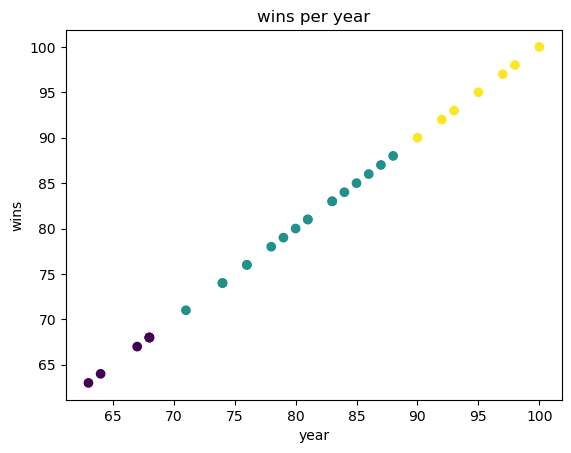

In [31]:
plt.scatter(data['W'],data['W'],c=data['win_bins'])
plt.title('wins per year')
plt.xlabel('year')
plt.ylabel('wins')

In [34]:
data = data[data['W']>1900]

In [35]:
runs_per_year = {}
games_per_year = {}

for i, row in data.iterrows():
    year = row['W']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

In [36]:
print(runs_per_year)

{}


In [37]:
print(games_per_year)

{}


In [38]:
mlb_runs_per_game = {}

for k,v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs/games

In [39]:
print(mlb_runs_per_game)

{}


In [43]:
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

In [44]:
data['year_label'] = data['W'].apply(assign_label)


In [45]:
dummy_data = pd.get_dummies(data['year_label'],prefix='era')

In [47]:
dummy_data.head()

""


In [49]:
data = pd.concat([data,dummy_data],axis=1)

In [50]:
data.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,win_bins,year_label


In [51]:
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]
data['mlb_rpg'] = data['W'].apply(assign_mlb_rpg)

In [52]:
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010

In [53]:
data['decade_label'] = data['W'].apply(assign_decade)

In [54]:
decade_data = pd.get_dummies(data['decade_label'],prefix='decade')
decade_data.head()

""


In [55]:
data = pd.concat([data,decade_data],axis=1)

In [56]:
data = data.drop(['W','year_label','decade_label'],axis=1)